In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# read the Houses dataset CSV file
housing_data = pd.read_csv("./RealEstate.csv", sep=",")
print(housing_data[0:5])

      MLS            Location     Price  Bedrooms  Bathrooms  Size  \
0  132842       Arroyo Grande  795000.0         3          3  2371   
1  134364         Paso Robles  399000.0         4          3  2818   
2  135141         Paso Robles  545000.0         4          3  3032   
3  135712           Morro Bay  909000.0         4          4  3540   
4  136282  Santa Maria-Orcutt  109900.0         3          1  1249   

   Price/SQ.Ft      Status  
0       335.30  Short Sale  
1       141.59  Short Sale  
2       179.75  Short Sale  
3       256.78  Short Sale  
4        87.99  Short Sale  


In [3]:
# only get the Size and the Price features
Xs = housing_data[['Size']]
Ys = housing_data[['Price']]
print("Size shape:", Xs.shape)
print("Price shape:", Ys.shape)
dataset_size = Xs.shape[0]
print("Size:", dataset_size)

Size shape: (781, 1)
Price shape: (781, 1)
Size: 781


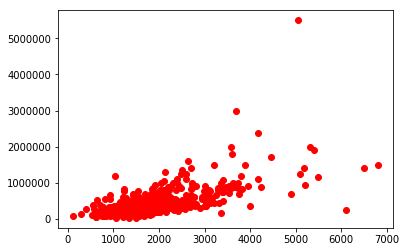

In [4]:
# plot the price and the size
plt.plot(Xs, Ys, 'ro')

In [5]:
Xs = Xs.values.squeeze()
Ys = Ys.values.squeeze()

In [6]:
# Normalize the input features using min max normallization
max_size = np.max(Xs)
min_size = np.min(Xs)
max_price = np.max(Ys)
min_price = np.min(Ys)

In [7]:
Xs = (Xs - min_size) / (max_size - min_size)
Ys = (Ys - min_price) / (max_price - min_price)

In [8]:
# separate dataset into 80% for training and 20% for testing
train_size = int(0.8 * dataset_size)
Xs_train = Xs[0:train_size]
Xs_test = Xs[train_size:]
Ys_train = Ys[0:train_size]
Ys_test = Ys[train_size:]

Text(0,0.5,'Price')

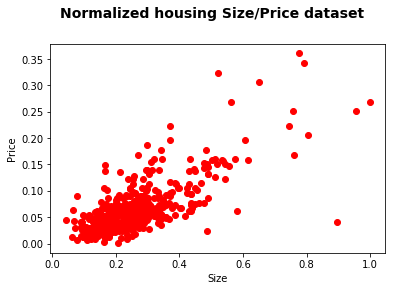

In [9]:
# plot the price and the size
fig = plt.figure()
fig.suptitle('Normalized housing Size/Price dataset', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.plot(Xs_train, Ys_train, 'ro')
ax.set_xlabel('Size')
ax.set_ylabel('Price')

In [10]:
min_x = np.min(Xs_train)
max_x = np.max(Xs_train)

In [11]:
# Define the Linear model
# Initialize the weights using a normal (Gaussian) distribution with 0 mean and unit variance
W0 = np.random.normal(loc=0, scale=0.02) # Y intercept
W1 = np.random.normal(loc=0, scale=0.02) # Slop of the line
print(W0, W1)

-0.004256504299469714 -0.0013834691173605252


In [12]:
def next_batch(Xs, Ys, batch_size=64):
    # provides new batches for training and testing 
    # after each epoch, shuffle the dataset records
    p = np.random.permutation(len(Xs))
    Xs = Xs[p]
    Ys = Ys[p]
    for i in range(0,Xs.shape[0],batch_size):
        yield Xs[i:i+batch_size], Ys[i:i+batch_size]

In [22]:
def eval_and_plot(W0, W1, min_x, max_x, id_):
    min_y = W0 + np.dot(W1, min_x)
    max_y = W0 + np.dot(W1, max_x)
    plt.plot(Xs_train, Ys_train, 'ro')
    plt.plot([min_x, max_x], [min_y, max_y], 'k-', lw=2)
    plt.savefig("./media/fit%(number)04d.png" % {"number": id_})
    plt.show()

In [14]:
# defines the size of the step we want to perform in the direction of the gradient
lr = 0.001

# set the pocket weights
W0_hat = np.inf
W1_hat = np.inf
best_hypothesis = np.inf

err_test_list = []
last_best_err = np.inf

In [ ]:
for epoch in range(500):
    for Xs_batch, Ys_batch in next_batch(Xs, Ys, batch_size=128):

        # linearly combine input and weights
        Y_pred = W0 + np.dot(W1, Xs_batch)

        # calculate the SSE between predicted and true values
        err = 1/2 * sum((Ys_batch-Y_pred)**2)

        # calculate the gradients with respect to W0 and W1
        DW0 = - (Y_pred-Ys_batch)
        DW1 = - (Xs_batch * (Y_pred - Ys_batch))

        # update W0 and W1 in the opposite direction to the gradient
        W0 = W0 + lr * sum(DW0)
        W1 = W1 + lr * sum(DW1)
    
    #only need for saving line hypothesis during training
    #eval_and_plot(W0, W1, min_x, max_x, epoch+1)
    
    # test in the end of epoch
    # test current hypothesis using the testing set
    Y_pred = W0 + np.dot(W1, Xs_test)
    err = 1/2 * sum((Ys_test-Y_pred)**2)
    print("Epoch:", epoch, "Generalization err:", err)
    err_test_list.append(err)
    
    # only save the best parameters so far in training (pocket strategy)
    last_best_err = err
    epoch += 1
    if err < best_hypothesis:
        best_hypothesis = err
        W0_hat = W0
        W1_hat = W1

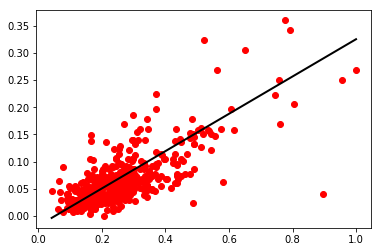

In [23]:
# best model hypothesis after training
eval_and_plot(W0_hat, W1_hat, min_x, max_x, epoch+1)

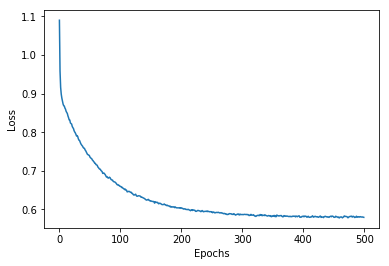

In [19]:
# plot loss/epoch curve
plt.plot(err_test_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()